### **Age-related Macular Degeneration (AMD) Audit**

## I. Introduction


<div style="text-align: justify; line-height: 1.5;">

Age-related macular degeneration (AMD) is an increasingly important public health issue due to ageing populations and increased longevity. The macula is the central part of the retina, the lining of the back of the eye. The macula is responsible for our central vision and gives fine detail and colour vision, enabling us to read, watch TV and recognise faces. The macular disease can affect people of any age, and the risk of getting the most common form, known as age-related macular degeneration or AMD, increases with age. At age 60, around one in every 200 people has AMD. However, by age 90, it affects one person in five.  [1]
Although it does not cause blindness, it certainly affects the patient's quality of life. If left without treatment, the condition may become worse. Depending on the type of AMD, dry AMD has no treatment, but vision aids can help to reduce the effect. Patients with wet AMD would require regular injections or occasionally a light treatment called photodynamic therapy to retain the vision. Advances in retinal imaging have identified biomarkers of progression to late age-related macular degeneration. [2]


_Figure 1_. Normal Eye vs Macular Degeneration

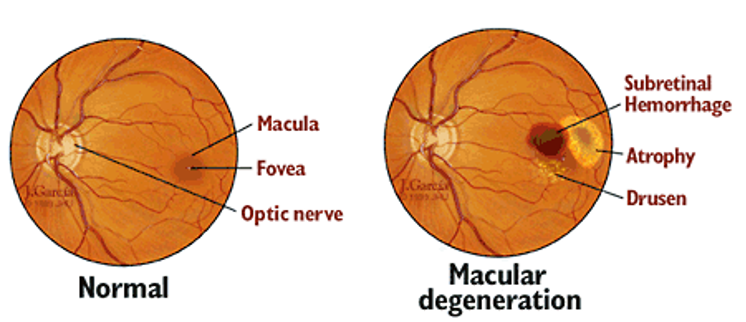


Figure 1 above is the comparison of normal and AMD retina. The AMD image on the right displays indications of AMD: regions of atrophy, where the retinal tissue has thinned or worn away; subretinal haemorrhage, which indicates bleeding behind the retina; and yellow deposits called drusen, which are frequent in AMD. Since the macula is the focal point of these alterations, AMD's significant effects on central vision can be explained.


</div>

## II. Background

<div style="text-align: justify; line-height: 1.5;">

Kelvin Yi Chong Teo et al. defined the driver of good vision gains to be the number of treatments administered. The NOD audit cohort also received a median number of 7 injections over 12 months. They also assessed the completion of the loading phase within the care process paradigm. Almost 70% of the patients completed their three loading injections within ten weeks of the first treatment. This proportion suggests a high level of service provision and emphasis on early treatment to maximise outcomes. Taken together, early and intensive treatment has been shown to provide optimal outcomes, and these measures of access care processes should continue to be tracked in this audit. Their audit provides high-quality, real-world evidence (RWE) in informing the effectiveness of VEGF inhibitors in clinical practice today in the UK.[3]

Bhandari et al. aimed to identify whether the outcome of AMD in routine practice has changed over time. Their analysis consisted of 3802 eyes being observed, and the mean VA change at 12 months remained stable, with no discernible trends. The median number of injections in eyes that completed 12-month follow-up also remained steady at 8–9 for AMD (+3.3 to +6 letters). The mean VA at baseline in their study in their study's eyes with AMD (59 letters) was higher than in eyes that received VEGF inhibitors in their registrational clinical trials.[4] 
The limitations of the study were inherent to those of observational studies. There was empirical evidence that observational studies do not consistently overestimate the effectiveness of therapeutic agents. [4]

The AMD clinical audit aims to provide a standardised benchmark for the participating ophthalmic eye centres for how the treatment is given, identify the possible gaps to improve the treatment result and preserve patient safety and quality of life. Visual acuity is a measure of the ability of the eye to distinguish shapes and the details of objects at a given distance. [5] The dataset features enable the determination of the change in visual acuity using the adjusted, unadjusted and partially adjusted VA and the percentage of eyes with VA ≥ 70 ETDRS one year after the start of the treatment. The descriptive analysis uses the location information of the NHS Trusts and the treatment and visual acuity metrics. 
It then gets grouped/cross-tabulated with the deidentified patient demographics, indicating the participating NHS trust performance and prioritising patient safety. The diagnostic analysis will use the features to identify the cause of significant changes in the visual acuity or the decrease in the percentage of the good VA year variable. The proposed analysis aims to find the correlation between the variables and combine the data to answer the research question. How does the treatment distribution vary across the treatment centres? How does the number of treatments (injections) correlate with improving visual acuity? How does the median change in visual acuity compare between the unadjusted and partially adjusted measurements?




</div>


## III. Data Ethics

<div style="text-align: justify; line-height: 1.5;">

The Royal College of Ophthalmologists published the National Age-related Macular Degeneration (AMD) Audit Year 1 data acquired from the data.gov.uk domain, and was last updated on 09 August 2023. The topic is classified as Health Licence. The Licensor grants a worldwide, royalty-free, perpetual, non-exclusive licence to use the information subject to the conditions. This licence does not affect the freedom under fair dealing or fair use or any other copyright or database right exceptions and limitations.

The data contains public sector information licensed under the Open Government Licence (OGL) v3.0. The OGL does not cover the use of personal data. There is no need to register or apply to use the OGL. Users need to ensure that their use of information complies with OGL terms.  The dataset does not consist of personally identifiable information, nor can the grouping of the columns identify any individuals because the data focuses on the quality of the contributing NHS centres. It is impossible to aggregate or group the data to find identifiable information on this dataset. 
The treatment outcomes, same as other components of the datasets used, are not representing a single event, but the overall number of procedures trust-wise, therefore the clinical outcome cannot be misinterpreted which prevents any false prediction to compromise patient safety.

</div>

## IV. Analysis and Results



In [60]:
# Library Imports

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px

# Data Manipulation
import pandas as pd
import numpy as np

# Web Scraping and File I/O
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
import os
import requests

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Requirements.txt
if os.path.exists('requirements.txt'):
    print("'requirements.txt' already exists.")
else:
    # Capture the pip freeze output
    output = !pip freeze

    # Write the output to requirements.txt
    with open('requirements.txt', 'w') as f:
        f.write('\n'.join(output))
    print("requirements.txt file is generated.")


'requirements.txt' already exists.


### 4.1 Data Acquisition and Inspcection

#### 4.1.1 Web Scraping

<div style="text-align: justify; line-height: 1.5;">

The data file in CSV format was web-scraped from the data.gov.uk domain using the BeautifulSoup library. First, the URL tables were printed to find the class of the table which contains the CSV file. Next, the file was saved to the data directory in a binary mode since the dataset has a tabular representation. The CSV file was loaded in the Jupyter notebook file ‘DV_CW2.ipynb’ using the ‘pandas’ library. 

</div>

In [62]:
html = urlopen('https://www.data.gov.uk/dataset/9e4e9f93-7acc-423b-8184-d6f4b4910832/rcophth-nod-national-age-related-macular-degeneration-amd-audit-year-1-data')
bs = BeautifulSoup(html, "html.parser") 

In [63]:
tableHead = bs.find_all('table') 
print([th for th in tableHead]) 

[<table class="govuk-table govuk-!-margin-bottom-4">
<thead class="govuk-table__head">
<tr class="govuk-table__row">
<th class="govuk-table__header" scope="col">Link to the data</th>
<th class="govuk-table__header" scope="col">Format</th>
<th class="govuk-table__header" scope="col">File added</th>
<th class="govuk-table__header" scope="col">Data preview</th>
</tr>
</thead>
<tbody class="govuk-table__body">
<tr class="js-datafile-visible govuk-table__row">
<td class="govuk-table__cell">
<a class="govuk-link" data-ga-event="download" data-ga-format="CSV" data-ga-publisher="royal-college-of-ophthalmologists" href="https://nodaudit.org.uk/sites/default/files/2023-02/NOD%20AMD%20Audit%20Patient%20Summary%202023.pdf">
<span class="visually-hidden">Download </span>
                RCOphth NOD National AMD Audit Year 1 Patient summary
                <span class="visually-hidden">, Format: PDF, Dataset: RCOphth NOD National Age-related Macular Degeneration (AMD) Audit Year 1 data</span>
</a> <

In [64]:
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        if link.attrs['href'].endswith('.csv'):
            print(link.attrs['href'])
            csv_url = link.attrs['href']
            local_directory = os.getcwd() # get current working directory
            filename = os.path.join(local_directory, "data", "National AMD NHS Year 2020 data.csv")

            if os.path.exists(filename): # check if file already exists
                print(f"The file {filename} already exists in the path: {local_directory}.")
                continue
        
            response = requests.get(csv_url)

            if response.status_code == 200: # = OK HTML Status
                with open(filename, 'wb') as csv_file: # binary mode as data as tabular
                    csv_file.write(response.content)
                data = pd.read_csv(filename)

            else:
                print(f"Failed to download {csv_url}. Status code: {response.status_code}")

https://nodaudit.org.uk/sites/default/files/2023-09/National%20AMD%20audit%20year%201%20data.csv
The file /Users/sandorkanda/Desktop/MSc/Data Visualisation/DV_CW2/data/National AMD NHS Year 2020 data.csv already exists in the path: /Users/sandorkanda/Desktop/MSc/Data Visualisation/DV_CW2.


In [65]:
df = pd.read_csv(filename)

### 4.1.2 Data Inspection



In [66]:
df.head()

,CentreName,ODSCode,Country,CentreType,ITCLocation,CentreNumber,NumberEligibleEyes,NumberOfPatients,PercentageFirstEye,Q1AgeFirstEye,...,MedianInjections,NumberEligibleEyesYear1,PercentageEyesYear1VA,Q1Year1VA,MedianYear1VA,Q3Year1VA,PercentageEyesChangeVAData,UnadjustedChangeVA,PartiallyAdjustedChangeVA,PercentageGoodVAYear1
0,MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST,RP6,England,NHS,NaN,1,1287,1170,63.0,66.9,...,7,1200.0,96.7,51.0,67.0,76.0,92.9,5.0,2.8,44.8
1,THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATION TRUST,RTD,England,NHS,NaN,2,655,603,62.7,74.3,...,7,580.0,95.0,50.0,65.0,75.0,89.0,5.0,2.0,45.5
2,LEEDS TEACHING HOSPITALS NHS TRUST,RR8,England,NHS,NaN,4,335,308,66.0,75.6,...,7,312.0,96.5,52.0,65.0,72.0,91.3,2.0,1.8,35.6
3,OXFORD UNIVERSITY HOSPITALS NHS FOUNDATION TRUST,RTH,England,NHS,NaN,6,348,325,64.9,75.7,...,7,330.0,97.0,40.0,60.0,74.0,96.7,0.0,2.3,37.9
4,UNIVERSITY HOSPITALS BRISTOL AND WESTON NHS FOUNDATION TRUST,RA7,England,NHS,NaN,7,526,489,62.4,76.0,...,7,460.0,96.1,55.0,70.0,80.0,80.4,5.0,0.8,48.9


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CentreName                    63 non-null     object 
 1   ODSCode                       63 non-null     object 
 2   Country                       63 non-null     object 
 3   CentreType                    63 non-null     object 
 4   ITCLocation                   8 non-null      object 
 5   CentreNumber                  63 non-null     int64  
 6   NumberEligibleEyes            63 non-null     int64  
 7   NumberOfPatients              63 non-null     int64  
 8   PercentageFirstEye            63 non-null     float64
 9   Q1AgeFirstEye                 61 non-null     float64
 10  MedianAgeFirstEye             61 non-null     float64
 11  Q3AgeFirstEye                 61 non-null     float64
 12  PercentageSecondEye           63 non-null     float64
 13  Q1AgeSe

| Varuable Type           |       Description                                                                       |
|----------------------|-------------------------------------------------------------------------------------------|
| int64 | A 64-bit signed integer|
| float64	 | Python float values are represented as 64-bit double-precision values|
| object | The data actually stored in object arrays are references to Python objects, not the objects themselves|

In [68]:
df.describe()

,CentreNumber,NumberEligibleEyes,NumberOfPatients,PercentageFirstEye,Q1AgeFirstEye,MedianAgeFirstEye,Q3AgeFirstEye,PercentageSecondEye,Q1AgeSecondEye,MedianAgeSecondEye,...,MedianInjections,NumberEligibleEyesYear1,PercentageEyesYear1VA,Q1Year1VA,MedianYear1VA,Q3Year1VA,PercentageEyesChangeVAData,UnadjustedChangeVA,PartiallyAdjustedChangeVA,PercentageGoodVAYear1
count,63.000000,63.000000,63.000000,63.000000,61.000000,61.000000,61.000000,63.000000,55.000000,55.000000,...,63.000000,62.000000,62.000000,63.000000,62.000000,63.000000,62.000000,60.00000,60.000000,62.000000
mean,67.333333,324.634921,291.460317,66.914286,74.686885,80.834426,86.204918,21.463492,76.854545,82.429091,...,6.571429,291.645161,93.135484,46.920635,63.451613,73.071429,84.369355,3.10000,2.113333,36.977419
std,55.992511,266.772000,228.889664,6.350892,2.398644,1.782497,1.396952,6.952333,2.846689,2.057297,...,1.058213,241.938489,12.148509,9.079935,5.795497,5.083066,17.450328,2.28258,1.468709,10.731071
min,1.000000,30.000000,28.000000,50.000000,64.900000,75.400000,82.100000,1.900000,62.700000,75.100000,...,4.000000,33.000000,10.000000,12.500000,32.000000,43.000000,5.200000,0.00000,0.300000,4.500000
25%,24.000000,174.000000,157.500000,63.650000,74.000000,80.000000,85.400000,19.450000,75.550000,81.000000,...,6.000000,157.250000,93.550000,43.500000,60.000000,70.000000,82.425000,1.00000,1.475000,30.850000
50%,44.000000,253.000000,230.000000,67.300000,75.100000,81.000000,86.400000,22.400000,77.200000,82.900000,...,7.000000,229.000000,96.550000,47.000000,65.000000,74.000000,91.150000,3.50000,1.900000,37.100000
75%,109.000000,352.500000,323.000000,70.500000,76.000000,81.800000,87.000000,26.000000,78.450000,83.650000,...,7.000000,326.750000,98.075000,53.000000,66.500000,75.000000,94.875000,5.00000,2.625000,43.125000
max,193.000000,1350.000000,1170.000000,82.700000,79.600000,84.400000,89.400000,36.700000,82.100000,86.500000,...,9.000000,1220.000000,100.000000,65.000000,75.000000,85.000000,100.000000,10.00000,11.100000,64.500000


In [69]:
df['Country'].dtype

dtype('O')

### Dataset Descriiption

In [70]:
pd.set_option('display.max_colwidth', None)  # Show full width of the columns

description = pd.read_excel('data/AMD_Data_Description.xlsx')
description 

,Variable name,Variable description
0,CentreName,The name of the contributing centre.
1,CentreNumber,The number allocated to each centre in the results published in RCOphth NOD reports.
2,CentreType,"Indicates if the funding nature for the treatment provided, for example traditional NHS Trust, Independent Sector Treatment Centre, private provider of fee paying treatment or located in a Crown Dependency."
3,Country,Country or Crown Dependency where the participating centre is located.
4,GoodBaselineVA,The proportion of eyes with a baseline VA >70 ETDRS letters
5,ITCLocation,The Independent Sector Treatment Centre location. This applies to Independent Treatment Centre organisations who have supplied data.
6,MedianAgeBilateral,Median age in years of the patients at the time at the time treatment for ISBIVT patients.
7,MedianAgeFirstEye,Median age in years of the patients at the time of the first injection in the first treated eye.
8,MedianAgeSecondEye,Median age in years of the patients at the time of the first injection in the first treated eye.
9,MedianBaselineVA,Median baseline ETDRS letter visual acuity. Note results are not produced for centres with <25 eligible eyes with a baseline VA measurement.


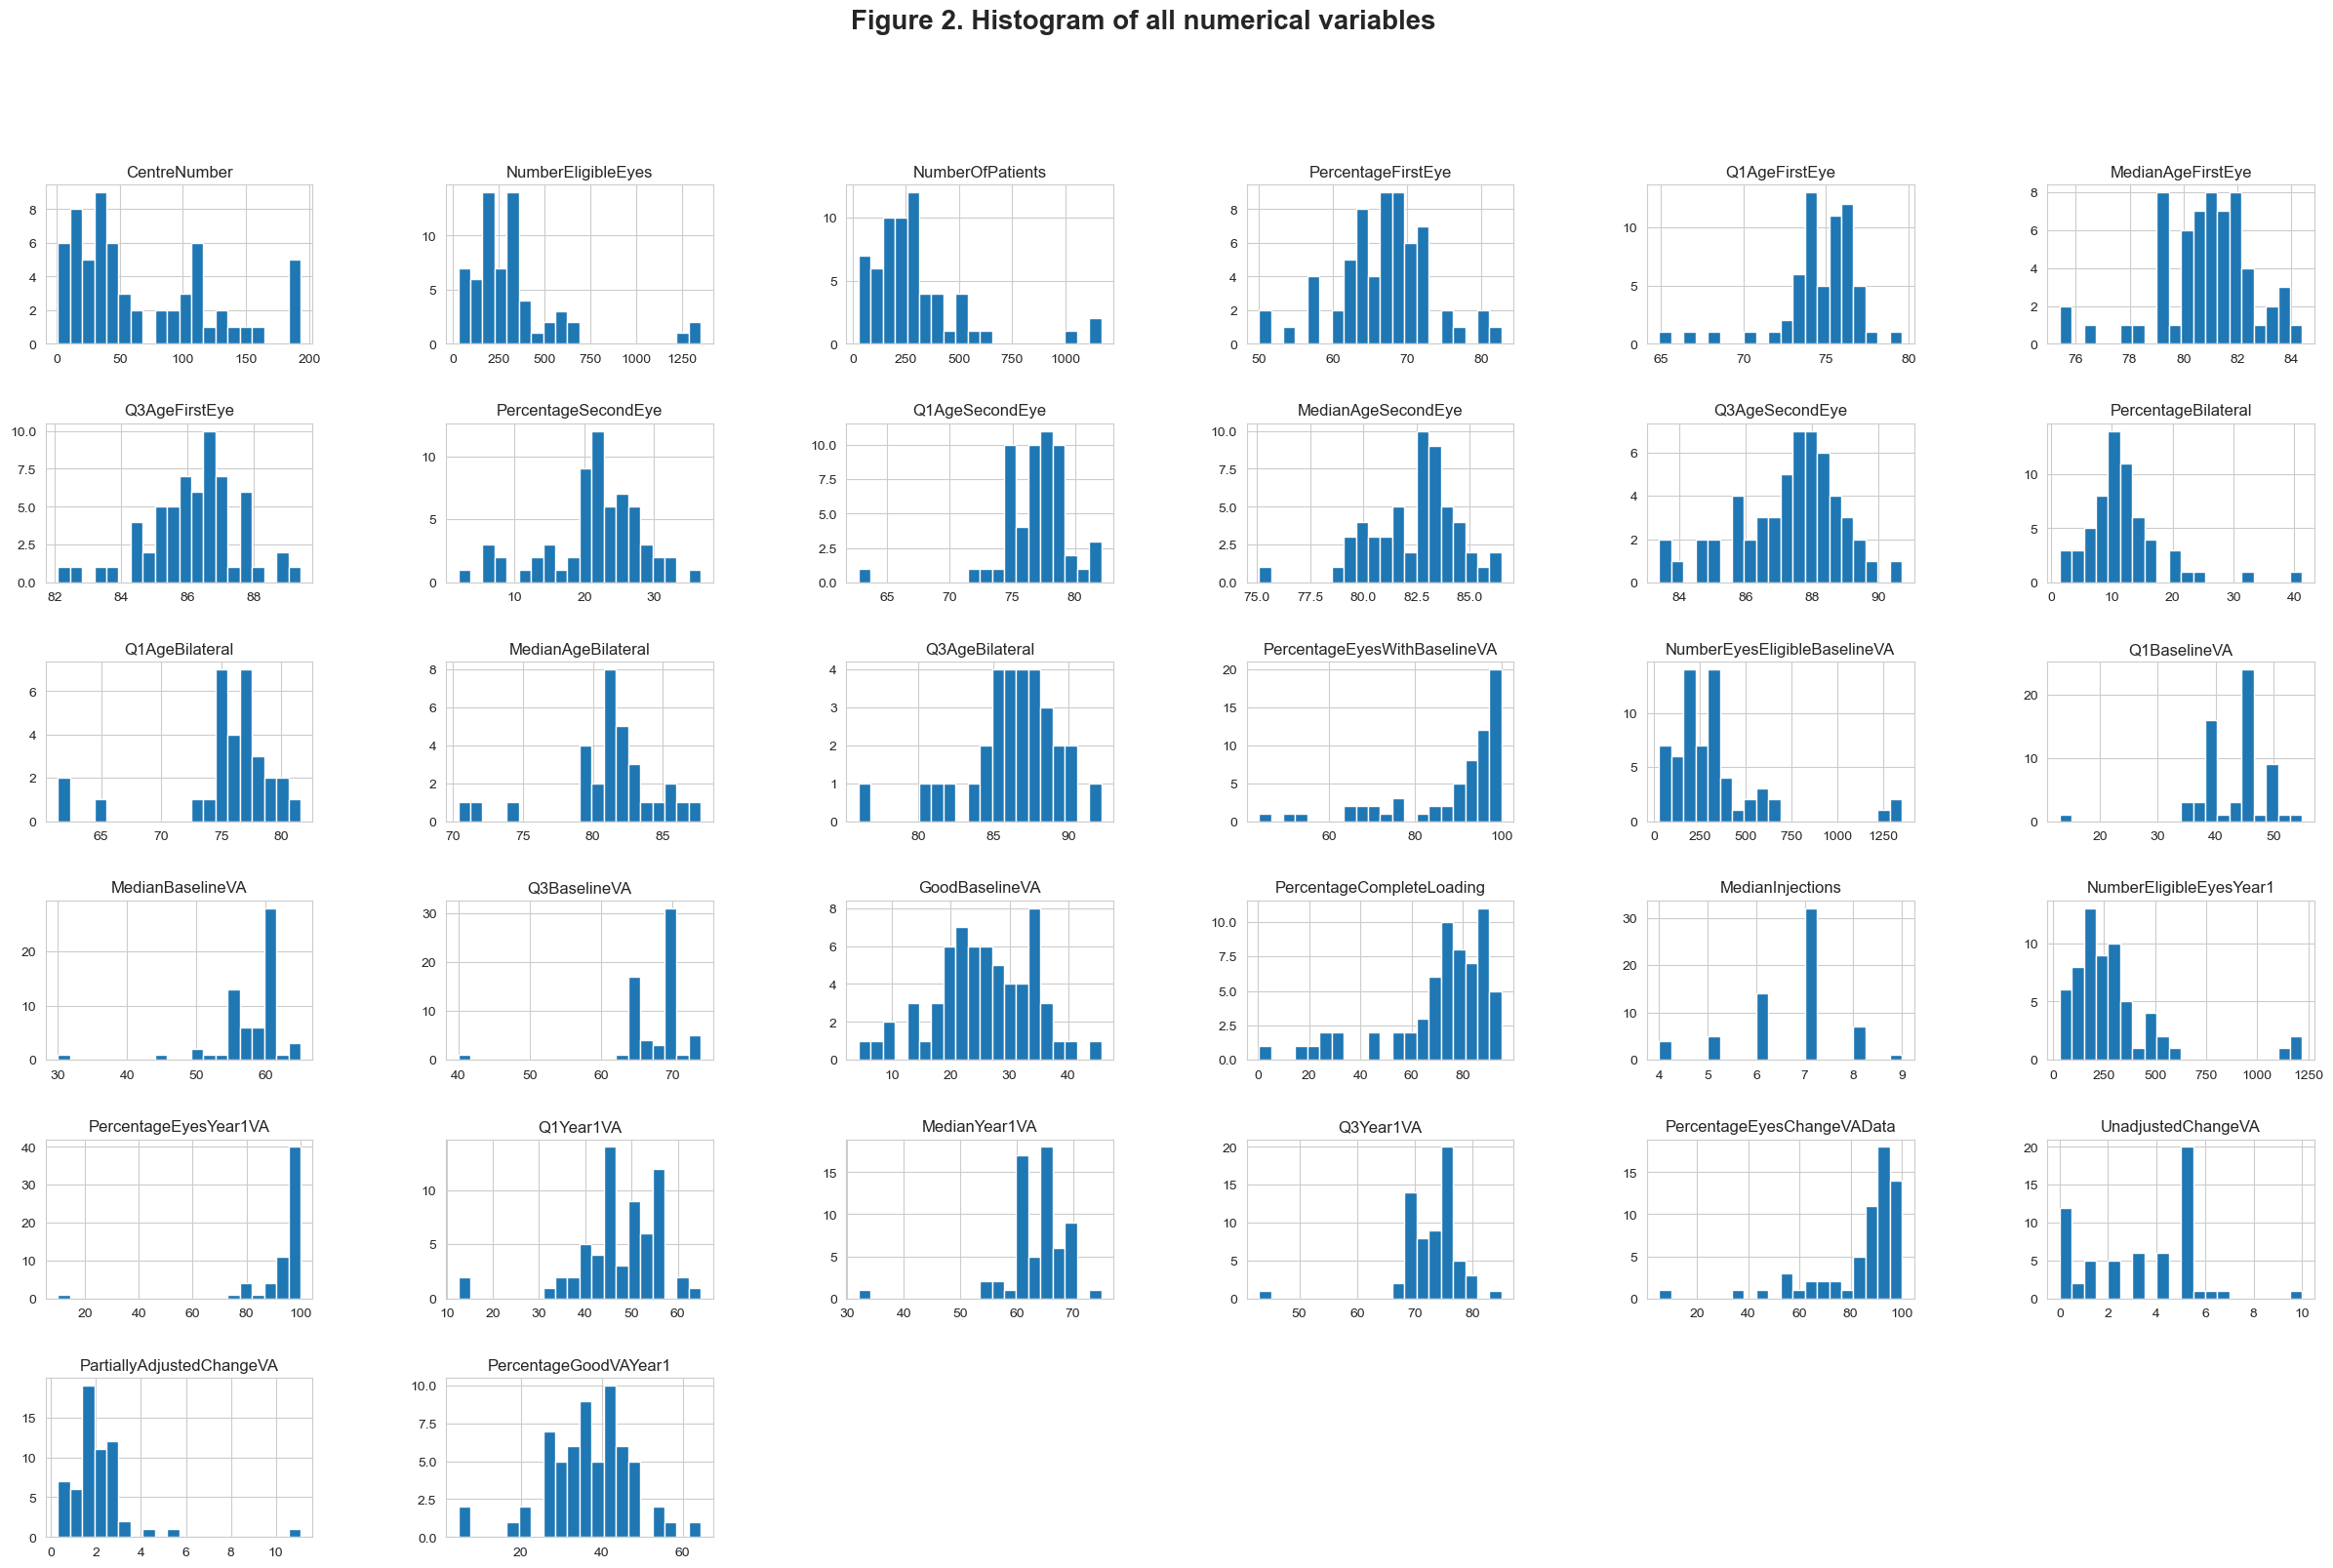

In [71]:
# Histogram of all numerical variables to observe the distribution of the data
df.hist(bins=20, figsize=(30,18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Figure 2. Histogram of all numerical variables", fontsize=20, fontweight='bold')
plt.show()


<div style="text-align: justify; line-height: 1.5;">

Figure 2 above enables the visual assessment of the data distribution. The skewness is an indicator of the intensity and the direction of the tail of the distribution. 

</div>

In [72]:
df_num = df.select_dtypes(include=['number'])

df_num.head() 

,CentreNumber,NumberEligibleEyes,NumberOfPatients,PercentageFirstEye,Q1AgeFirstEye,MedianAgeFirstEye,Q3AgeFirstEye,PercentageSecondEye,Q1AgeSecondEye,MedianAgeSecondEye,...,MedianInjections,NumberEligibleEyesYear1,PercentageEyesYear1VA,Q1Year1VA,MedianYear1VA,Q3Year1VA,PercentageEyesChangeVAData,UnadjustedChangeVA,PartiallyAdjustedChangeVA,PercentageGoodVAYear1
0,1,1287,1170,63.0,66.9,75.4,82.8,26.4,71.6,79.6,...,7,1200.0,96.7,51.0,67.0,76.0,92.9,5.0,2.8,44.8
1,2,655,603,62.7,74.3,81.2,86.1,25.0,77.5,82.7,...,7,580.0,95.0,50.0,65.0,75.0,89.0,5.0,2.0,45.5
2,4,335,308,66.0,75.6,80.7,87.2,23.3,75.2,82.4,...,7,312.0,96.5,52.0,65.0,72.0,91.3,2.0,1.8,35.6
3,6,348,325,64.9,75.7,82.7,87.1,27.6,79.0,83.6,...,7,330.0,97.0,40.0,60.0,74.0,96.7,0.0,2.3,37.9
4,7,526,489,62.4,76.0,81.8,86.1,26.2,78.1,83.0,...,7,460.0,96.1,55.0,70.0,80.0,80.4,5.0,0.8,48.9


In [73]:
df_num.skew().sort_values(ascending=False)

PartiallyAdjustedChangeVA       4.086807
NumberEligibleEyesYear1         2.509257
NumberEyesEligibleBaselineVA    2.371909
NumberEligibleEyes              2.371909
NumberOfPatients                2.231805
PercentageBilateral             1.953325
CentreNumber                    0.865667
UnadjustedChangeVA              0.150337
PercentageFirstEye             -0.192186
GoodBaselineVA                 -0.270812
Q3AgeFirstEye                  -0.468322
PercentageGoodVAYear1          -0.611055
Q3AgeSecondEye                 -0.628007
MedianInjections               -0.741877
PercentageSecondEye            -0.781333
MedianAgeFirstEye              -0.807298
MedianAgeSecondEye             -0.819149
Q3AgeBilateral                 -1.119308
MedianAgeBilateral             -1.324563
Q1Year1VA                      -1.596642
PercentageCompleteLoading      -1.598519
PercentageEyesWithBaselineVA   -1.687494
Q1AgeFirstEye                  -1.962914
Q1AgeBilateral                 -2.003800
Q1BaselineVA    

In [74]:
skewness = df_num.skew()

# Set a threshold for determining whether the distribution is skewed
high_skewness_threshold = 1

# Loop through the skewness Series
for column, skew_value in skewness.items():
    if abs(skew_value) > high_skewness_threshold:
        # If yes, impute missing values with median
        df_num[column].fillna(df_num[column].median(), inplace=True)
    else:
        # If no, impute missing values with mean
        df_num[column].fillna(df_num[column].mean(), inplace=True)

# After imputation, check for missing values again
missing_vals_after = df_num.isnull().sum()
missing_vals_after

CentreNumber                    0
NumberEligibleEyes              0
NumberOfPatients                0
PercentageFirstEye              0
Q1AgeFirstEye                   0
MedianAgeFirstEye               0
Q3AgeFirstEye                   0
PercentageSecondEye             0
Q1AgeSecondEye                  0
MedianAgeSecondEye              0
Q3AgeSecondEye                  0
PercentageBilateral             0
Q1AgeBilateral                  0
MedianAgeBilateral              0
Q3AgeBilateral                  0
PercentageEyesWithBaselineVA    0
NumberEyesEligibleBaselineVA    0
Q1BaselineVA                    0
MedianBaselineVA                0
Q3BaselineVA                    0
GoodBaselineVA                  0
PercentageCompleteLoading       0
MedianInjections                0
NumberEligibleEyesYear1         0
PercentageEyesYear1VA           0
Q1Year1VA                       0
MedianYear1VA                   0
Q3Year1VA                       0
PercentageEyesChangeVAData      0
UnadjustedChan


<div style="text-align: justify; line-height: 1.5;">

The subset of the dataset, which included numerical values only, called df_num, was created to enable the automated imputation of the missing numerical values. Using the pandas skew() function, the quantitative analysis provided accurate information on the skewness coefficients. 

This information benefited the treatment of the missing values, as the highly skewed data benefits from the median imputation, and the relatively symmetric features benefit from the mean imputation. The skewness threshold value of 1 was used as a conditional statement while looping through the numerical dataset to set the imputation to the median if the skewness coefficient is higher than a threshold and the mean value otherwise.

</div>

In [75]:
df['CentreName'] = df['CentreName'].str.title().str.strip()

In [76]:
# Check for missing values
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing_vals

ITCLocation                     55
MedianAgeBilateral              32
Q1AgeBilateral                  32
Q3AgeBilateral                  32
Q3AgeSecondEye                   8
MedianAgeSecondEye               8
Q1AgeSecondEye                   8
PartiallyAdjustedChangeVA        3
UnadjustedChangeVA               3
Q3AgeFirstEye                    2
PercentageBilateral              2
MedianAgeFirstEye                2
Q1AgeFirstEye                    2
PercentageEyesYear1VA            1
MedianYear1VA                    1
PercentageEyesChangeVAData       1
NumberEligibleEyesYear1          1
PercentageGoodVAYear1            1
ODSCode                          0
PercentageFirstEye               0
Country                          0
CentreType                       0
CentreNumber                     0
Q3Year1VA                        0
NumberEligibleEyes               0
Q1Year1VA                        0
NumberOfPatients                 0
MedianInjections                 0
PercentageSecondEye 

In [77]:
unique_vals = df['ITCLocation'].unique()
print(unique_vals)

[nan 'MANCHESTER' 'GILLINGHAM' 'ROCHDALE' 'BIRMINGHAM' 'WEST LANCASHIRE'
 'MANCHESTER EYE HOSPITAL' 'YORKSHIRE EYE HOSPITAL' 'COVENTRY']


In [78]:
unique_vals_ = df['Country'].unique()
print(unique_vals_)

['England' 'Guernsey' 'Cymru' 'Northern Ireland' 'Scotland']


In [79]:
# Group by 'Country' and count the number of patients in each country
country_patient_count = df.groupby('Country')['NumberOfPatients'].sum()
country_patient_count

Country
Cymru                1035
England             15909
Guernsey               57
Northern Ireland      809
Scotland              552
Name: NumberOfPatients, dtype: int64

In [80]:
print(df.columns)

Index(['CentreName', 'ODSCode', 'Country', 'CentreType', 'ITCLocation',
       'CentreNumber', 'NumberEligibleEyes', 'NumberOfPatients',
       'PercentageFirstEye', 'Q1AgeFirstEye', 'MedianAgeFirstEye',
       'Q3AgeFirstEye', 'PercentageSecondEye', 'Q1AgeSecondEye',
       'MedianAgeSecondEye', 'Q3AgeSecondEye', 'PercentageBilateral',
       'Q1AgeBilateral', 'MedianAgeBilateral', 'Q3AgeBilateral',
       'PercentageEyesWithBaselineVA', 'NumberEyesEligibleBaselineVA',
       'Q1BaselineVA', 'MedianBaselineVA', 'Q3BaselineVA', 'GoodBaselineVA',
       'PercentageCompleteLoading', 'MedianInjections',
       'NumberEligibleEyesYear1', 'PercentageEyesYear1VA', 'Q1Year1VA',
       'MedianYear1VA', 'Q3Year1VA', 'PercentageEyesChangeVAData',
       'UnadjustedChangeVA', 'PartiallyAdjustedChangeVA',
       'PercentageGoodVAYear1'],
      dtype='object')


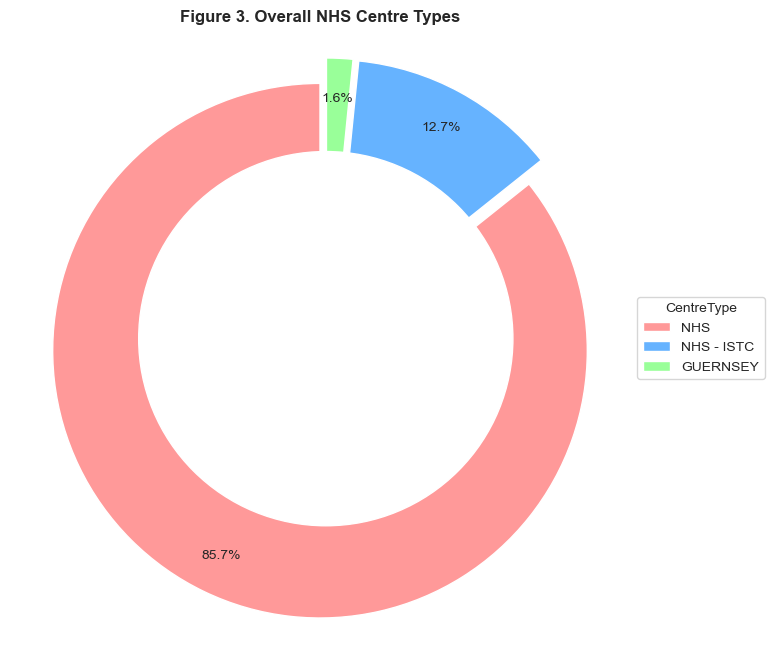

In [81]:
centretype_counts = df['CentreType'].value_counts()

# Define colors and explode parameters for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99']
explode = [0.05] * len(centretype_counts)  # An explode value for each category

# Create a pie chart without labels on the slices, since we have a legend
plt.figure(figsize=(8, 8))
plt.pie(centretype_counts, 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=explode,
        pctdistance=0.85)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title('Figure 3. Overall NHS Centre Types', fontweight='bold')
plt.legend(labels=centretype_counts.index, title='CentreType', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


<div style="text-align: justify; line-height: 1.5;">
In Figure 3 above, 85.7% of the centre types are NHS, 12.7% are NHS Independent Sector Treatment Centres (ISTC), and 1.6% are Guernsey.

</div>

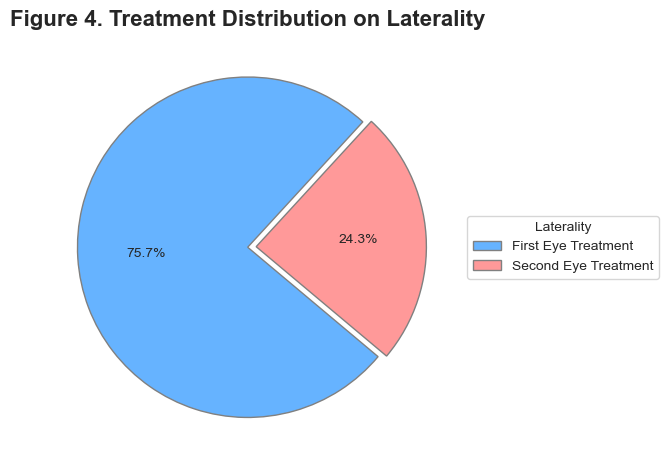

In [82]:
def pie_chart(df):
    
    percentage_first_eye = df_num['PercentageFirstEye'].mean()
    percentage_second_eye = df_num['PercentageSecondEye'].mean()

    d = {
        'Category': ['First Eye Treatment', 'Second Eye Treatment'],
        'Percentage': [percentage_first_eye, percentage_second_eye]
    }

    pc_df = pd.DataFrame(d)
    
    explode = (0, 0.05)
    ax = pc_df.plot.pie(
        y='Percentage',
        labels= None,
        explode = explode,
        autopct='%1.1f%%',
        startangle=-40,
        counterclock=False,
        colors=['#66b3ff', '#ff9999'],
        wedgeprops={'edgecolor': 'grey'},
        legend= True
        
    )

    ax.set_title('Figure 4. Treatment Distribution on Laterality', size =16, fontweight='bold')
    ax.get_yaxis().set_visible(False)
    plt.legend(labels=pc_df['Category'], 
               title='Laterality', 
               loc='center left', 
               bbox_to_anchor=(1, 0.5) # position of legend
            )
    
    plt.tight_layout()
    plt.show()

pie_chart(df)

<div style="text-align: justify; line-height: 1.5;">

In Figure 4 above, the pie chart depicts the distribution of eye treatments based on laterality, meaning whether the treatment was for the first or second eye. The chart's blue portion represents the First Eye Treatment, which accounts for 75.7% of the treatments.
The red portion represents the Second Eye Treatment, making up 24.3% of the treatments.
The chart shows that a more significant majority of the treatments were for the first eye, which could suggest that fewer patients proceed to have their second eye treated after receiving treatment in one eye.

</div>

Figure 5. Histogram and Density Plot for Median Age of First and Second Eye Treatment
Figure 5. Histogram and Density Plot for Median Age of First and Second Eye Treatment


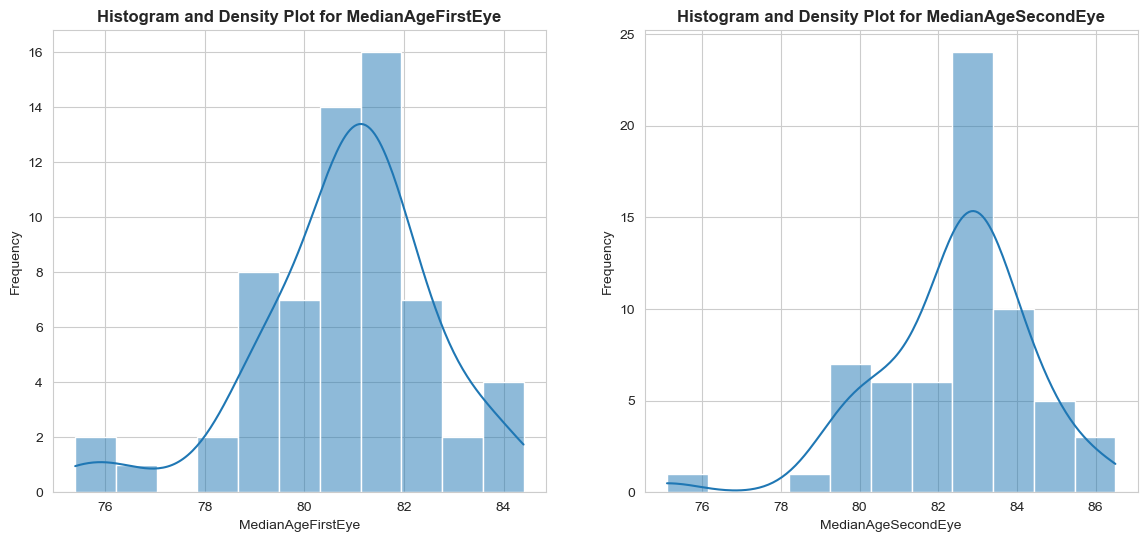

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))
vars = ['MedianAgeFirstEye', 'MedianAgeSecondEye']

# Creating two subplots, side by side
for index, variable in enumerate(vars, 1):
    plt.subplot(1, 2, index)
    sns.histplot(data=df_num, x=variable, kde=True)  # kde=True adds a density plot
    plt.title(f'Histogram and Density Plot for {variable}', fontweight='bold')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    print("Figure 5. Histogram and Density Plot for Median Age of First and Second Eye Treatment")


<div style="text-align: justify; line-height: 1.5;">

In Figure 5 above, the histogram for ‘MedianAgeFirstEye’ on the left depicts the frequency distribution of the median age for patients at the time of the first injection in the first treated eye. The distribution is bell-shaped but slightly skewed to the right, indicating a higher concentration of younger patients within the median age range. The plot on the right represents the frequency distribution of the median age for patients at the time of the first injection in the second treated eye, where there is a prominent peak around the 82–84-year mark, suggesting that most patients receiving second eye treatments are around this median age.

</div>

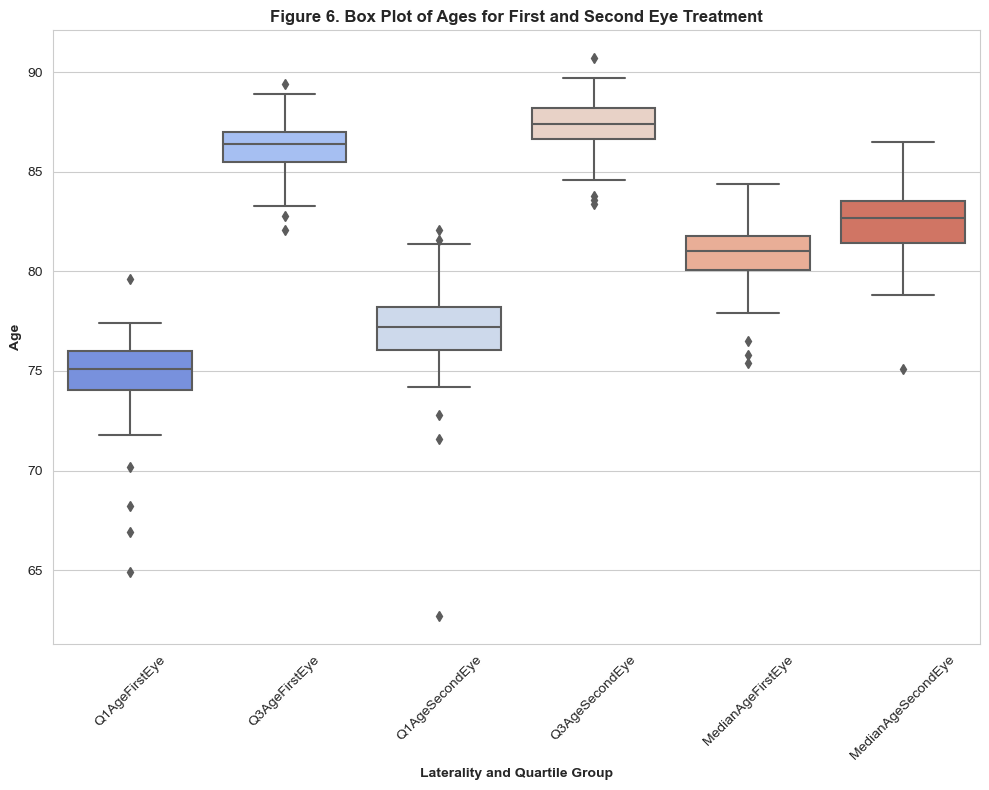

In [84]:
vars = df_num[['Q1AgeFirstEye', 
               'Q3AgeFirstEye', 
               'Q1AgeSecondEye', 
               'Q3AgeSecondEye', 
               'MedianAgeFirstEye', 
               'MedianAgeSecondEye']]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))

# Melting the DataFrame to long-form
df_melted = vars.melt(var_name='AgeGroup', value_name='Age')

sns.boxplot(x='AgeGroup', 
            y='Age', 
            data=df_melted, 
            palette="coolwarm")
plt.title('Figure 6. Box Plot of Ages for First and Second Eye Treatment', fontweight='bold')
plt.xlabel('Laterality and Quartile Group', fontweight='bold')
plt.ylabel('Age', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

<div style="text-align: justify; line-height: 1.5;">

In Figure 6 above, the box plot visualisation compares the distribution of ages for patients receiving first and second eye treatments. The median age for the first treated eye is slightly lower than for the second, suggesting that patients tend to receive their first eye treatment at a younger median age. The ages for the first eye treatment are tightly clustered. In contrast, the second eye treatment shows a broader spread, suggesting more variability in the ages at which patients receive their second treatment. Outliers present for first and second treatments, which could be exceptionally young or old patients outside the typical age range.

</div>

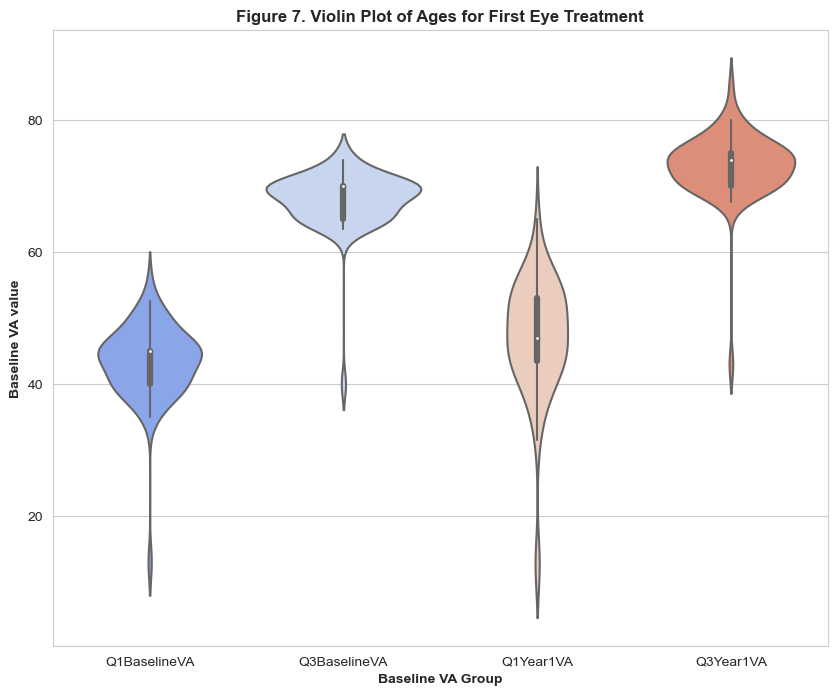

In [85]:
vars = df_num[['Q1BaselineVA', 'Q3BaselineVA', 'Q1Year1VA', 'Q3Year1VA']]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))

# Melting the DataFrame to long-form
df_melted = vars.melt(var_name='VA Group', value_name='VA Value')

sns.violinplot(x='VA Group', 
            y='VA Value', 
            data=df_melted, 
            palette="coolwarm")
plt.title('Figure 7. Violin Plot of Ages for First Eye Treatment', fontweight='bold')
plt.xlabel('Baseline VA Group', fontweight='bold')
plt.ylabel('Baseline VA value',fontweight='bold')
plt.show()

<div style="text-align: justify; line-height: 1.5;">

The violin plot visualises the distribution of the baseline visual acuity at the first and third quartiles of the observed NHS year. The lower quartile (Q1) of the baseline VA values is represented by the first violin plot (leftmost, coloured in light blue). The contour of this figure shows the density of the data points at different VA levels. A more extensive section suggests more data points at that VA value. A white dot inside the violin represents the median, while a thicker bar inside the violin represents the interquartile range. The highest quartile (Q3) of baseline VA levels is depicted in the second figure (light blue). This plot is more prominent at higher VA values than the first, showing a higher density of individuals with more robust baseline vision in the top quartile. 
The third figure (light brown) depicts the VA levels in the bottom quartile (Q1) one year following therapy. 
This distribution appears to have a significantly tighter shape, implying reduced fluctuation in VA levels one year after treatment compared to the baseline. The fourth (red) panel depicts the highest quartile (Q3) of VA levels one year following therapy. This plot is more comprehensive at higher VA values than lower quartiles, indicating that some patients' eyesight may improve.

</div>

In [86]:

firstEye = df_num['MedianAgeFirstEye']
secondEye = df_num['MedianAgeSecondEye']

# Function to aggregate and print the results
def aggregate_and_print(objects, methods):
    
    for object_name, object_instance in objects.items():
        for method_name in methods:
            method = getattr(object_instance, method_name)
            print(f"{object_name}.{method_name}(): {method()}")

eyes = {
    "firstEye": firstEye,
    "secondEye": secondEye
}

methods = ["min", "max"]

aggregate_and_print(eyes, methods)

firstEye.min(): 75.4
firstEye.max(): 84.4
secondEye.min(): 75.1
secondEye.max(): 86.5


In [87]:
injection = df_num['MedianInjections']


# Function to aggregate and print the results
def aggregate_and_print(objects, methods):
    
    for object_name, object_instance in objects.items():
        for method_name in methods:
            method = getattr(object_instance, method_name)
            print(f"{object_name}.{method_name}(): {method()}")

eyes = {
    "injection": injection
}

methods = ["min", "max"]
aggregate_and_print(eyes, methods)

injection.min(): 4
injection.max(): 9


In [88]:
percentagegoodyr = {
    "percentagegoodyr": df_num['PercentageGoodVAYear1']
}

methods = ["min", "max"]
aggregate_and_print(percentagegoodyr, methods)

percentagegoodyr.min(): 4.5
percentagegoodyr.max(): 64.5


In [89]:
meaninjections = df_num['MedianInjections'].mean()
meaninjections

6.571428571428571

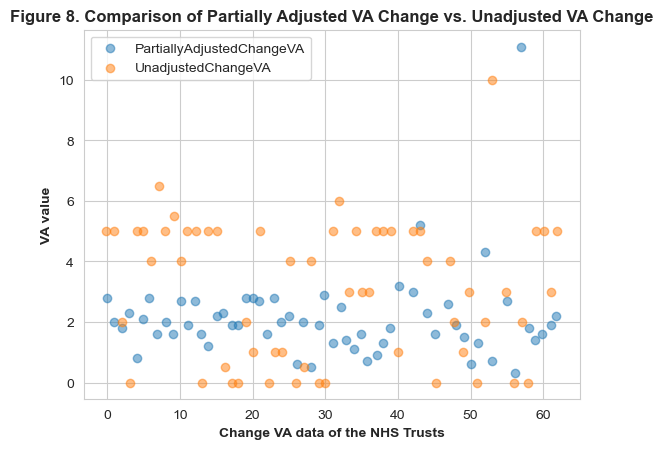

In [90]:
adjusted = df_num['PartiallyAdjustedChangeVA']
unadjusted = df_num['UnadjustedChangeVA']

plt.scatter(df_num.index + np.random.normal(0, 0.1, size=df_num.shape[0]), df['PartiallyAdjustedChangeVA'],
            alpha=0.5, label='PartiallyAdjustedChangeVA')
plt.scatter(df_num.index + np.random.normal(0, 0.1, size=df_num.shape[0]), df['UnadjustedChangeVA'],
            alpha=0.5, label='UnadjustedChangeVA')

plt.title('Figure 8. Comparison of Partially Adjusted VA Change vs. Unadjusted VA Change', fontweight='bold')
plt.xlabel('Change VA data of the NHS Trusts', fontweight='bold')
plt.ylabel('VA value', fontweight='bold')
plt.legend()
plt.show()



<div style="text-align: justify; line-height: 1.5;">

The scatter plot in Figure 8 compares two types of visual acuity (VA) change measurements: partially adjusted and unadjusted VA change. Each point on the plot represents a data entry from the dataset, and the y-axis represents the visual acuity value. The plot shows a distribution of points for both sets of data without a clear trend or correlation between the number of cases per centre and the VA change measurements. This suggests that the number of cases at a centre does not strongly predict the change in VA, whether adjusted or unadjusted. However, the lowest and the highest change appears to be unadjusted.

</div>

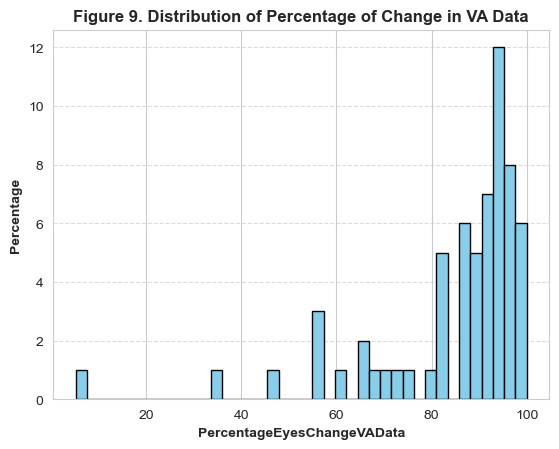

In [91]:
plt.hist(df_num['PercentageEyesChangeVAData'], bins=40, edgecolor='k', color='skyblue')
plt.title('Figure 9. Distribution of Percentage of Change in VA Data', fontweight='bold')
plt.xlabel('PercentageEyesChangeVAData', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()

<div style="text-align: justify; line-height: 1.5;">

The histogram in Figure 9 represents the distribution of the percentage of eyes with both baseline and one-year visual acuity measurements across different treatment centres. The x-axis shows the percentage of eyes with both a baseline and a one-year VA measurement, indicating follow-up completeness and the extent of monitoring over a year. The y-axis shows the frequency or percentage of centres falling into each percentage bin. The tallest bars are clustered towards the higher end of the x-axis between 80 and 100%, showing that many centres have high completion rates of one-year follow-up VA measurements. The bars at the lower end of the x-axis (below 60%) indicate that some centres have fewer eyes with complete one-year follow-up data, which might suggest follow-up or data collection challenges.

</div>

In [92]:
df_10 = df.sort_values(by='NumberOfPatients', ascending=False).head(20)
df_10 = df_10.iloc[: :-1]  

Leeds Teaching Hospitals Nhs Trust: 308
Hull University Teaching Hospitals Nhs Trust: 313
Royal Cornwall Hospitals Nhs Trust: 320
Guy'S And St Thomas' Nhs Foundation Trust: 321
Oxford University Hospitals Nhs Foundation Trust: 325
East Sussex Healthcare Nhs Trust: 365
Gloucestershire Hospitals Nhs Foundation Trust: 374
Royal Berkshire Nhs Foundation Trust: 375
University Hospital Southampton Nhs Foundation Trust: 382
Spamedica - Rochdale: 427
Spamedica - Birmingham: 472
University Hospitals Bristol And Weston Nhs Foundation Trust: 489
Manchester University Nhs Foundation Trust: 498
King'S College Hospital Nhs Foundation Trust: 500
Liverpool University Hospitals Nhs Foundation Trust: 533
Belfast Health And Social Care: 589
The Newcastle Upon Tyne Hospitals Nhs Foundation Trust: 603
Hywel Dda University Local Health Board: 1035
West Suffolk Nhs Foundation Trust: 1118
Moorfields Eye Hospital Nhs Foundation Trust: 1170


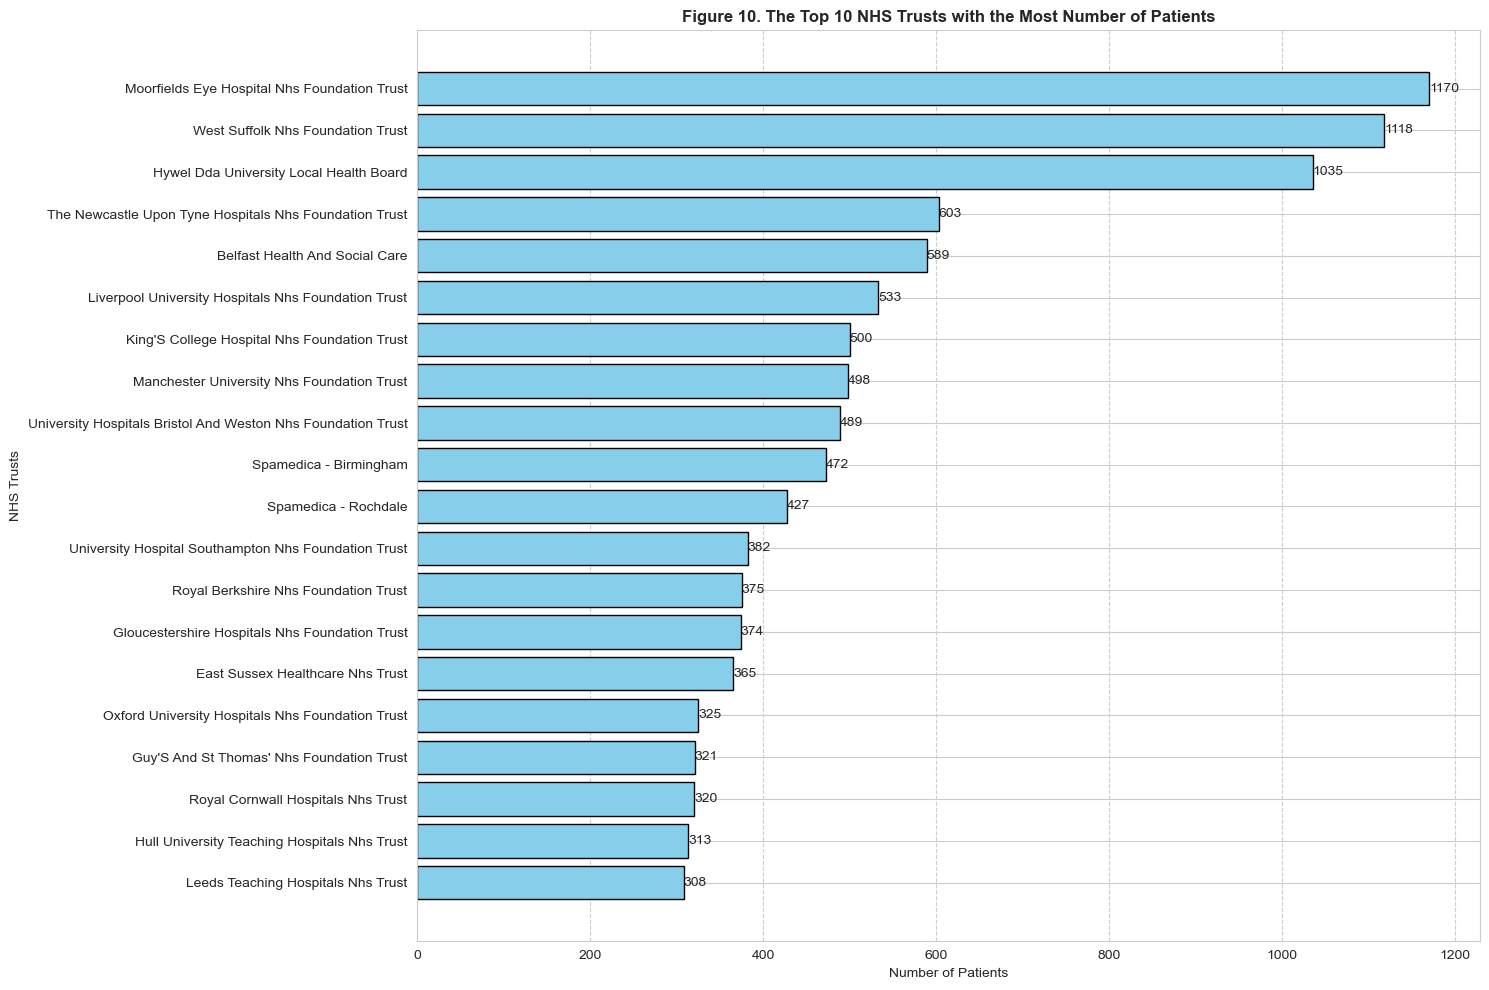

In [93]:
def horisontal_bar_plot(df_10):

    for i, row in df_10.iterrows():
        print(f"{row['CentreName']}: {row['NumberOfPatients']}")
        
    plt.figure(figsize=(15, 10))
    bars = plt.barh(df_10['CentreName'], df_10['NumberOfPatients'], edgecolor='k', color='skyblue') # horizontal bar plot for better readability
    plt.xlabel('Number of Patients')
    plt.ylabel('NHS Trusts')
    plt.title('Figure 10. The Top 10 NHS Trusts with the Most Number of Patients', fontweight='bold')
    plt.grid(axis='x', linestyle='--')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{(width)}', va='center') 

    plt.tight_layout()
    plt.show()

horisontal_bar_plot(df_10)

<div style="text-align: justify; line-height: 1.5;">

In Figure 10, A horizontal bar chart shows the ten NHS trusts with the highest patient volume. Leading the way with 1170 patients is Moorfields Eye Hospital NHS Foundation Trust, followed by West Suffolk NHS Foundation Trust (n = 1118) and Hywel Dda University Local Health Board (1035). A significant decrease in patient numbers is visible, as the 4th Trust has nearly two-thirds of the patients of Moorfields, and the 10th Trust has only one-third. Only the first ten trusts are shown for readability purposes so as not to over-cutter the notebook.

</div>

In [94]:
def print_aggregated_data(df_num, agg):
    for column, (label, method) in agg.items():
        res = getattr(df[column], method)() # get the method from the column
        print(f"{label}: {res}")

agg = {
    'NumberOfPatients': ('Total Patients', 'sum'),
    'CentreName': ('Total Trusts', 'count'),
    'MedianInjections': ('The Sum of Median Injections', 'sum'),
    'NumberEligibleEyes': ('Number of Eligible', 'sum'),
    'NumberEyesEligibleBaselineVA' : ('Number of Eyes Eligible Baseline VA', 'sum')

}

print_aggregated_data(df_num, agg)
print("The percentage of total vs. eligible baseline VA eyes: ", df_num['NumberEyesEligibleBaselineVA'].sum() / df_num['NumberEligibleEyes'].sum() * 100 , "%")
# print("The average number of operations per surgeon: " , data['NumberHESOperations'].sum() / data['NumberOfSurgeons'].sum())


Total Patients: 18362
Total Trusts: 63
The Sum of Median Injections: 414
Number of Eligible: 20452
Number of Eyes Eligible Baseline VA: 20452
The percentage of total vs. eligible baseline VA eyes:  100.0 %


In [95]:
country_data = df.groupby('Country').agg(
    NumberOfCentres=('CentreName', 'nunique'),
    NumberOfPatients=('NumberOfPatients', 'sum'),
    TotalInjections=('MedianInjections', 'sum'),
    MeanPercentageGoodVAYear1=('PercentageGoodVAYear1', 'mean'),
    ).reset_index()

country_data['MeanPercentageGoodVAYear1'] = country_data['MeanPercentageGoodVAYear1'].round(2)

country_data


,Country,NumberOfCentres,NumberOfPatients,TotalInjections,MeanPercentageGoodVAYear1
0,Cymru,1,1035,6,36.60
1,England,57,15909,377,36.34
2,Guernsey,1,57,6,48.00
3,Northern Ireland,2,809,12,42.10
4,Scotland,2,552,13,44.30


In [96]:
# Aggregate the data
agg_data = df.groupby('CentreNumber').agg({
    'MedianInjections': 'sum',
    'PercentageEyesChangeVAData': 'mean',
    'PercentageGoodVAYear1': 'mean'
}).reset_index()

# Display the first few rows of the aggregated data
agg_data

,CentreNumber,MedianInjections,PercentageEyesChangeVAData,PercentageGoodVAYear1
0,1,7,92.9,44.8
1,2,7,89.0,45.5
2,4,7,91.3,35.6
3,6,7,96.7,37.9
4,7,7,80.4,48.9
...,...,...,...,...
58,189,5,82.4,36.1
59,190,7,95.6,53.4
60,191,9,93.4,43.2
61,192,6,57.1,35.2


In [97]:
fig = px.line(df_10,
              x='CentreName',
              y='PercentageGoodVAYear1',
              title='Figure 11. Mean % Good Visual Acuity by the top Ten NHS Trusts with the Most Number of Patients',
              markers=True)

# Update layout to remove clutter
fig.update_layout(xaxis_title='', yaxis_title='Mean % Good VA at Year 1')

# Update x-axis ticks to show less or no labels to reduce clutter
fig.update_xaxes(showticklabels=False)

# Show the figure
fig.show()

<div style="text-align: justify; line-height: 1.5;">

Figure 11 shows the Plotly interactive line graph with the percentage of eyes with 70 ≥ ETDRS. The highest, 54%, is East Sussex Healthcare NHS Trust, and the lowest is Liverpool University Hospital NHS Trust, with 26.6%.

</div>

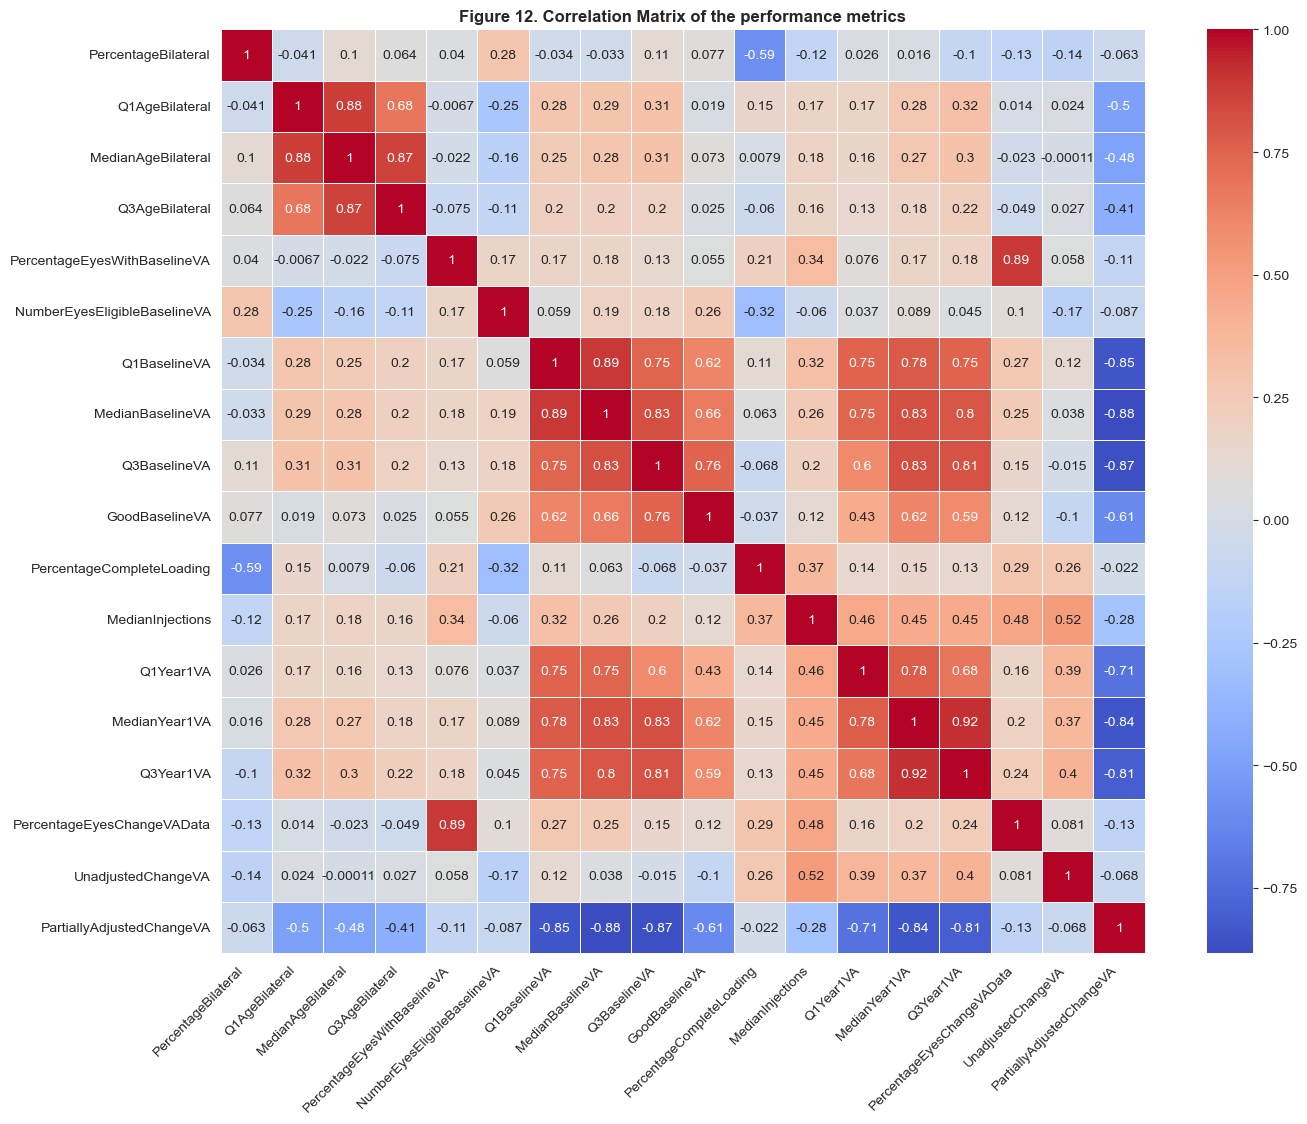

In [98]:
performance_vars = [
   

    "PercentageBilateral",
    "Q1AgeBilateral",
    "MedianAgeBilateral",
    "Q3AgeBilateral",
    "PercentageEyesWithBaselineVA",
    "NumberEyesEligibleBaselineVA",
    "Q1BaselineVA",
    "MedianBaselineVA",
    "Q3BaselineVA",
    "GoodBaselineVA",
    "PercentageCompleteLoading",
    "MedianInjections",
    "Q1Year1VA",
    "MedianYear1VA",
    "Q3Year1VA",
    "PercentageEyesChangeVAData",
    "UnadjustedChangeVA",
    "PartiallyAdjustedChangeVA",
]

correlation_matrix = df_num[performance_vars].corr()  

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm', 
            square=True, 
            linewidths=.5)

plt.title('Figure 12. Correlation Matrix of the performance metrics', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

<div style="text-align: justify; line-height: 1.5;">

Figure 12 above shows the annotated correlation of the performance variables. The correlation diagonally is 1.00 as the same variables are compared. The values are colour-coded for easier visualisation, and the annotated values represent the correlation between the variables. The VA data types show strong correlations, such as the percentage of eyes with baseline VA and those with change VA data.


</div>

In [99]:
corr_matrix = df_num[performance_vars].corr()
threshold = 0.8
high_corr = [(col, row) for col in corr_matrix.columns
             for row in corr_matrix.index 
             if (abs(corr_matrix[col][row]) > threshold) & (col != row)]

for i in high_corr:
    print(i)

('Q1AgeBilateral', 'MedianAgeBilateral')
('MedianAgeBilateral', 'Q1AgeBilateral')
('MedianAgeBilateral', 'Q3AgeBilateral')
('Q3AgeBilateral', 'MedianAgeBilateral')
('PercentageEyesWithBaselineVA', 'PercentageEyesChangeVAData')
('Q1BaselineVA', 'MedianBaselineVA')
('Q1BaselineVA', 'PartiallyAdjustedChangeVA')
('MedianBaselineVA', 'Q1BaselineVA')
('MedianBaselineVA', 'Q3BaselineVA')
('MedianBaselineVA', 'MedianYear1VA')
('MedianBaselineVA', 'PartiallyAdjustedChangeVA')
('Q3BaselineVA', 'MedianBaselineVA')
('Q3BaselineVA', 'MedianYear1VA')
('Q3BaselineVA', 'Q3Year1VA')
('Q3BaselineVA', 'PartiallyAdjustedChangeVA')
('MedianYear1VA', 'MedianBaselineVA')
('MedianYear1VA', 'Q3BaselineVA')
('MedianYear1VA', 'Q3Year1VA')
('MedianYear1VA', 'PartiallyAdjustedChangeVA')
('Q3Year1VA', 'Q3BaselineVA')
('Q3Year1VA', 'MedianYear1VA')
('Q3Year1VA', 'PartiallyAdjustedChangeVA')
('PercentageEyesChangeVAData', 'PercentageEyesWithBaselineVA')
('PartiallyAdjustedChangeVA', 'Q1BaselineVA')
('PartiallyAdjuste

<div style="text-align: justify; line-height: 1.5;">


Two predictive models aimed to predict the variable 'PercentageGoodVAYear1'. The performance variables were used as the predictors to predict the target variable. The Linear Regression model used 70% of the performance variables for training and the remaining 30% for testing. With an MSE of 127.8785 and an R2 of -0.5462, the linear regression model is shown in the output after the code. Given that a negative R2 shows that the model performs worse than a horizontal line fit to the data, this R2 result reveals that the model does not match the data well. Next, the k-nearest neighbour algorithm with k = 3 neighbours predicted the output variable with KNN Mean Squared Error (MSE):76.20896 and an R-squared (R2): 0.078539. The visualisation plots of the two models are displayed in Figure 13 and 14.

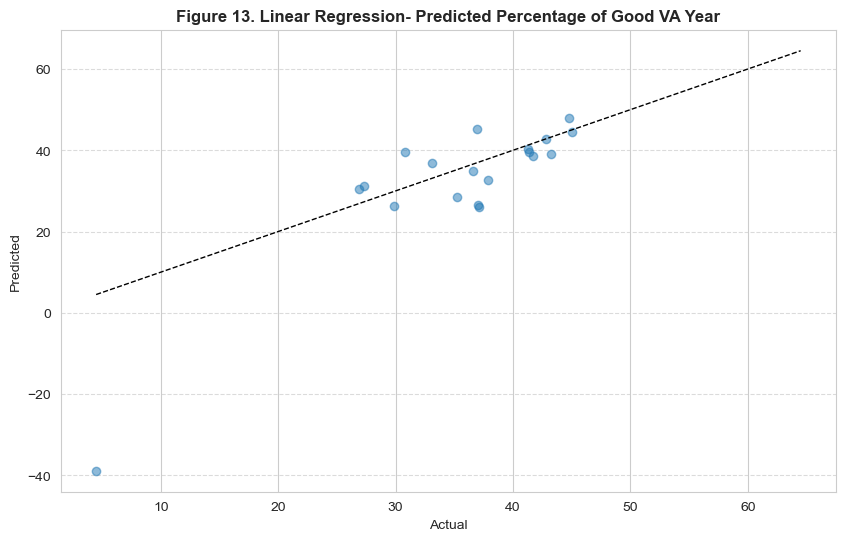

Linear Regression Mean Squared Error (MSE): 127.87850062924824
R-squared (R2): -0.5462089032734294


In [100]:

X = df_num[performance_vars]  
y = df_num['PercentageGoodVAYear1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LR_mse = mean_squared_error(y_test, y_pred)
LR_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.title('Figure 13. Linear Regression- Predicted Percentage of Good VA Year', fontweight='bold')
plt.show()
print("Linear Regression Mean Squared Error (MSE):", LR_mse)
print("R-squared (R2):", LR_r2)

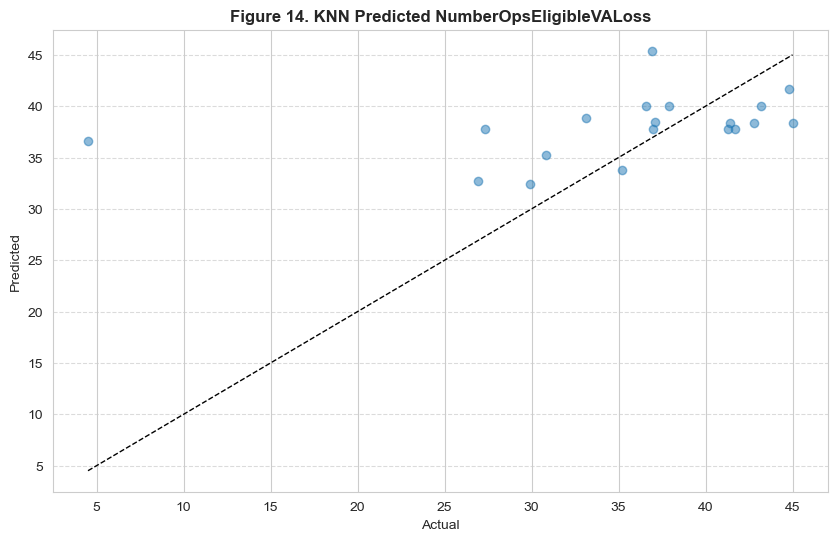

KNN Mean Squared Error (MSE): 76.2089687277507
R-squared (R2): 0.078539509172323


In [101]:
# Create the KNN model
knn_model = KNeighborsRegressor(n_neighbors=3)  

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate performance metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Plot actual vs predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.title('Figure 14. KNN Predicted NumberOpsEligibleVALoss', fontweight='bold')
plt.show()

print("KNN Mean Squared Error (MSE):", knn_mse)
print("R-squared (R2):", knn_r2)


## VIII. Conclusion

<div style="text-align: justify; line-height: 1.5;">

The analysis of AMD National Audit analysed the differences between patient outcomes based on the demographic, location and treatment metrics data provided in the dataset, using a methodological approach. Web scraping techniques acquired the file in CSV format. The file was loaded into the notebook and saved in the data folder. The inspection revealed the data format, the individual variables in Table X, and each column's statistical properties, such as the numerical features' mean, standard deviation, quartile, and min-max values. The skewness of the data provided insight into the distribution of the data points and helped the treatment of missing values. The threshold value determines whether the mean or the median value replaces the missing data. 

Eighteen thousand three hundred sixty-two patients were treated in 63 health centres with 414 injections to 20452 eyes. The donough chart shows the number of centre types represented in Figure 3. At the same time, the laterality data between the left and right eyes of the patients was described using a pie chart (Figure 4), histogram with a density plot visualised the median age of the first and second eye treatment (Figure 5). The box plot shows the quarterly and median age of both eye treatments. (Figure 6) The violin plot provides visual insights into the quarterly baseline VA (Figure 7). The scatter plot (Figure 8) compared the change in visual acuity, and the bar chart showed the distribution of percentile change in visual acuity (Figure 9). The horisontal bar chart plot showed the top ten trusts with the most patients (Figure 10), and the good visual acuity year percentage (Figure 11). The treatment distribution varies between 4-9 injections per year for the patients, with an overall mean of 6.57 injections in the first year of treatment. The percentage of the good year VA data is between 4.5% and 64.5%, which is a significant difference across the treatment centres. Future work would include creating new variables, aiming for a robust predictive model with more collected data and deeper insight into the statistical analysis to enable further vital findings. 

Despite the level of abstraction due to the ethical consideration of deidentification, the proposed analysis aims to find the correlation between the variables and combine the data to answer the research questions. In conclusion, the correlation analysis revealed that the percentage of eyes with VA change strongly relates to the baseline VA. There was no evidence that the median VA change would strongly relate to the partially adjusted / unadjusted VA change. There is a potential in future work to build a modular application that will enable the NHS Trusts to preserve patient safety and the high quality of the national AMD audit.


</div>

## References

[1]	R. H. Guymer and T. G. Campbell, ‘Age-related macular degeneration’, The Lancet, vol. 401, no. 10386, pp. 1459–1472, Apr. 2023, doi: 10.1016/S0140-6736(22)02609-5.

[2]	‘https://www.nhs.uk/conditions/age-related-macular-degeneration-amd/treatment/’.

[3]	K. Y. C. Teo, ‘The NOD audit: Insights into the current state of management for neovascular age-related macular degeneration’, Eye, vol. 37, no. 17, pp. 3521–3522, Dec. 2023, doi: 10.1038/s41433-023-02546-4.

[4]	S. Bhandari et al., ‘Changes in 12-month outcomes over time for age-related macular degeneration, diabetic macular oedema and retinal vein occlusion’, Eye, vol. 37, no. 6, pp. 1145–1154, Apr. 2023, doi: 10.1038/s41433-022-02075-6.

[5]	‘Marsden J, Stevens S, Ebri A. How to measure distance visual acuity. Community Eye Health. 2014;27(85):16. PMID: 24966459; PMCID: PMC4069781’.

Figure1. https://www.hopkinsmedicine.org/health/conditions-and-diseases/agerelatedmacular-degeneration-amd- Accessed on 04/01/2024.
